<a href="https://colab.research.google.com/github/navaneet-03/FA_Project/blob/main/FA_pomegranate_leaves1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pomegranate project**
We are to predict if the pomegranate is healthy, has fungal infection, or has bacterial infection using images of its leaves



First we're importing all the utilities and functions to work with the dataset

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import cv2

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Now we'll import the tensforflow utilities to build our cnn architecture

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

Now we shall import the dataset stored on google drive

In [ ]:
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive


Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
classes_map={'Bacterial' : 1, 'Fungal' : 2, 'Healthy' : 0}

In [ ]:
dir = "Pomegranate/Leafs/"


In [ ]:
tl = os.listdir(dir)
tl

['Bacterial', 'Fungal', 'Healthy']

In [ ]:
from google.colab.patches import cv2_imshow

Now, we shall work with the dataset and perform some image processing

In [ ]:
def get_data():
  images = []
  labels = []
  train_list = os.listdir(dir)
  print(train_list)
  for i in train_list:
    flag = 1
    for image in os.listdir(dir+ "/" + i):
      img=cv2.imread(dir + i + '/' + image)
      # img=cv2.resize(img, (224,224))
      img=cv2.resize(img,(256,256))
      if flag:
        print()
        print(i)
        cv2_imshow(img)
        flag = 0
      images.append(img)
      labels.append(classes_map[i])

  return images, labels

['Bacterial', 'Fungal', 'Healthy']

Bacterial


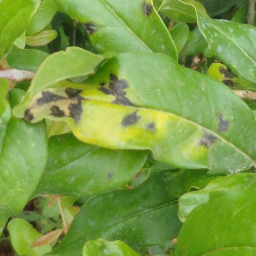


Fungal


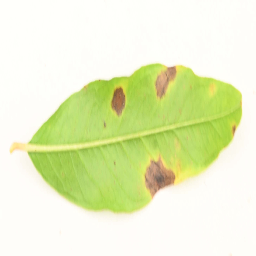


Healthy


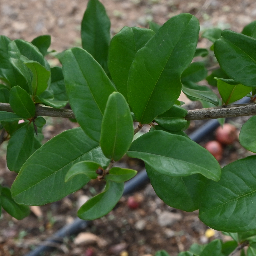

In [ ]:
X, Y = get_data()


In [ ]:
np_x=np.array(X)
label_encoded_y=to_categorical(Y)
#label_encoded_y

splitting the dataset to train validation and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np_x, label_encoded_y, test_size = 0.2, random_state=7)

classes=3
batch=32
epochs=40
learning_rate=0.001

## Building the CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(filters=10 , kernel_size = (5,5), activation= 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Conv2D(filters=25, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=20 , kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D( strides = (2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(3,activation = 'softmax'))


In [ ]:
adam = Adam(learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 10)      760       
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 10)     40        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 10)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 25)      2275      
                                                                 
 batch_normalization_1 (Batc  (None, 124, 124, 25)     1

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/40
5/5 [==============================] - 15s 261ms/step - loss: 5.5809 - accuracy: 0.5263 - val_loss: 25.0363 - val_accuracy: 0.4103
Epoch 2/40
5/5 [==============================] - 0s 61ms/step - loss: 3.0009 - accuracy: 0.6842 - val_loss: 69.5804 - val_accuracy: 0.4103
Epoch 3/40
5/5 [==============================] - 0s 61ms/step - loss: 1.3116 - accuracy: 0.7763 - val_loss: 70.2925 - val_accuracy: 0.4103
Epoch 4/40
5/5 [==============================] - 0s 64ms/step - loss: 1.0502 - accuracy: 0.8553 - val_loss: 43.8671 - val_accuracy: 0.4103
Epoch 5/40
5/5 [==============================] - 0s 59ms/step - loss: 0.8379 - accuracy: 0.9079 - val_loss: 36.8649 - val_accuracy: 0.4103
Epoch 6/40
5/5 [==============================] - 0s 59ms/step - loss: 0.5166 - accuracy: 0.9079 - val_loss: 25.1669 - val_accuracy: 0.4103
Epoch 7/40
5/5 [==============================] - 0s 59ms/step - loss: 0.1029 - accuracy: 0.9671 - val_loss: 14.1420 - val_accuracy: 0.4103
Epoch 8/40
5/5 [==

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

2/2 [==============================] - 0s 140ms/step - loss: 0.7786 - accuracy: 0.8542
Test accuracy: 0.8541666865348816
Test loss: 0.7786244750022888


In [ ]:
y_pred_ = model.predict(x_test)
y_pred = []
#print(y_pred_)
for i in y_pred_:
  m = 0
  for x in range(len(i)):
    temp = [0,0,0]
    if i[x] > i[m]:
      m = x
    temp[m] = 1
  y_pred.append(temp)


2/2 [==============================] - 0s 8ms/step


In [ ]:
from sklearn.metrics import classification_report
print("Test Data\n", classification_report(y_test, y_pred, target_names = ['Healthy', 'Bacterial', 'Fungal']))

Test Data
               precision    recall  f1-score   support

     Healthy       1.00      0.46      0.63        13
   Bacterial       0.92      1.00      0.96        23
      Fungal       0.71      1.00      0.83        12

   micro avg       0.85      0.85      0.85        48
   macro avg       0.88      0.82      0.81        48
weighted avg       0.89      0.85      0.84        48
 samples avg       0.85      0.85      0.85        48



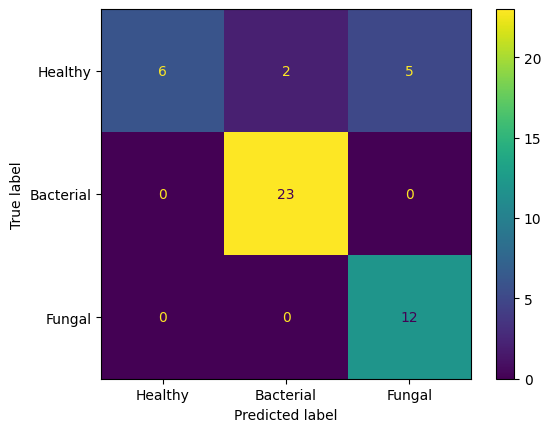

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_t = [np.argmax(i) for i in y_test]
y_p = [np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_t, y_p)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Healthy', 'Bacterial', 'Fungal'])
cm_display.plot()
plt.show()

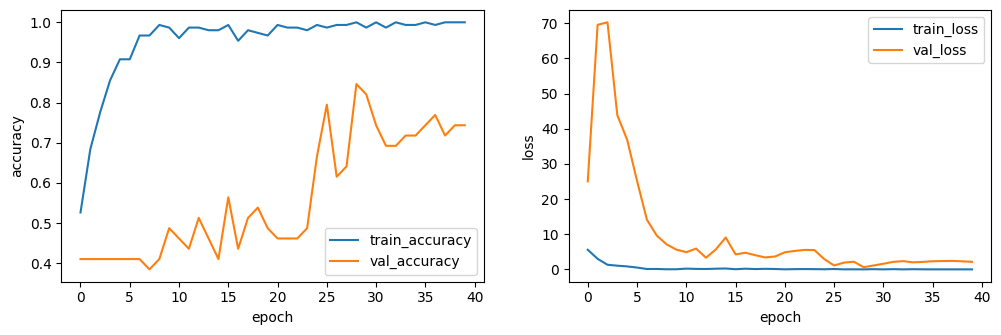

In [ ]:
def plot_results(model):

    plt.figure(figsize=(12, 12))
    plt.subplot(3, 2, 1)
    plt.plot(history.history['accuracy'], label = 'train_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(3, 2, 2)
    plt.plot(history.history['loss'], label = 'train_loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()



plot_results(model)